# Error bound of posit and floating point numbers for different SPNs size

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv("build/stats.csv", header=None, sep=' ')

In [3]:
data.columns = ["folder", "filename", "n_nodes", "n_mult", "n_add", "is_posit", "nBits", "es", "min_rel_err", "max_rel_err"]
data["folder"] = data['folder'].apply(lambda x: os.path.split(x)[-1])
data = data.loc[data['max_rel_err'] != float("inf")]
data = data.loc[data['min_rel_err'] != float("inf")]
data = data.loc[data['max_rel_err'] < 1]
data = data.loc[data['min_rel_err'] < 1]

data_posit = data.loc[data['is_posit'] == 1]
data_float = data.loc[data['is_posit'] == 0]

data.head()

,folder,filename,n_nodes,n_mult,n_add,is_posit,nBits,es,min_rel_err,max_rel_err
3,adult,0-205.spn,4531,3585,946,1,20,6,0.0,0.104598
4,adult,0-205.spn,4531,3585,946,1,24,6,0.0,0.006237
5,adult,0-205.spn,4531,3585,946,1,28,6,0.0,0.000389
6,adult,0-205.spn,4531,3585,946,1,31,6,0.0,0.000049
11,adult,0-205.spn,4531,3585,946,0,24,11,0.0,0.051000


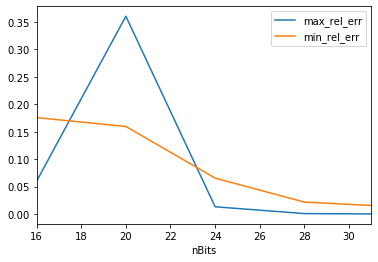

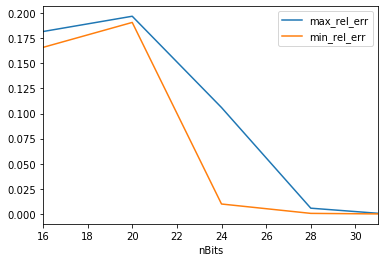

In [4]:
data_size = data_posit.groupby(data['nBits']).aggregate({'min_rel_err':'mean',
                                                         'max_rel_err':'mean'})
data_size.plot(y=['max_rel_err', 'min_rel_err'])

data_size_float = data_float.groupby(data['nBits']).aggregate({'min_rel_err':'mean',
                                                         'max_rel_err':'mean'})
data_size_float.plot(y=['max_rel_err', 'min_rel_err'])

Nbits =  16
Nbits =  20
Nbits =  24
Nbits =  28
Nbits =  31


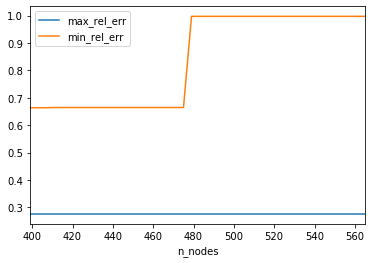

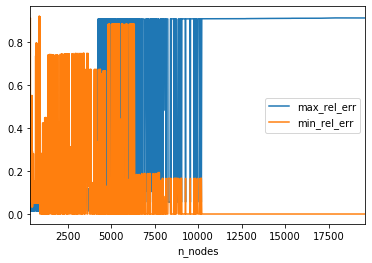

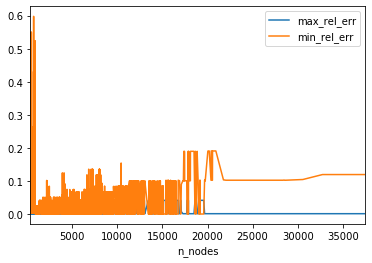

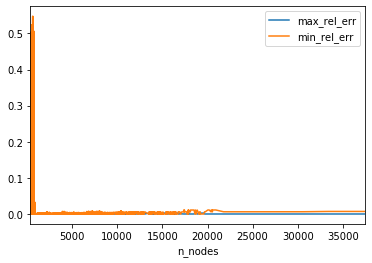

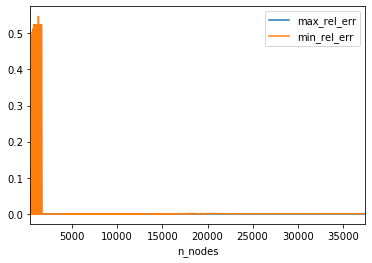

In [41]:
nBits = [16, 20, 24, 28, 31]

for nb in nBits:
    data_nbits = data_posit.loc[data_posit['nBits'] == nb]
    print('Nbits = ', nb)
    data_size2 = data_nbits.groupby(data_nbits['n_nodes']).aggregate({'min_rel_err':'mean',
                                                                       'max_rel_err':'mean'})
    data_size2.plot(y=['max_rel_err', 'min_rel_err'])

Nbits =  16
Nbits =  20
Nbits =  24
Nbits =  28
Nbits =  31


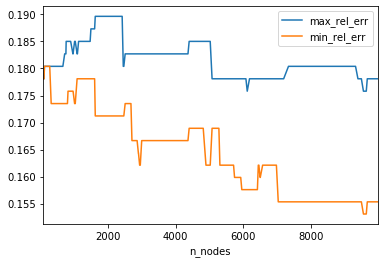

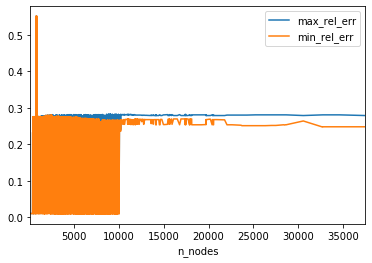

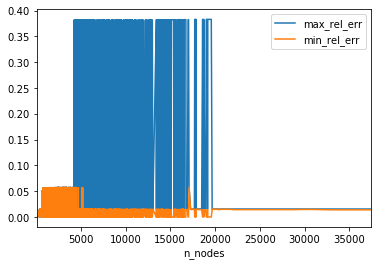

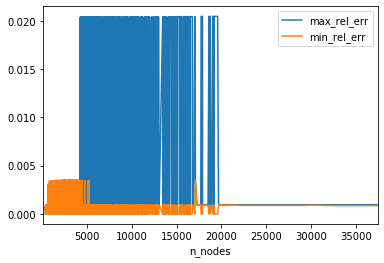

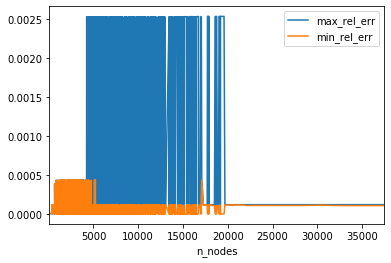

In [6]:
nBits = [16, 20, 24, 28, 31]

for nb in nBits:
    data_nbits = data_float.loc[data_float['nBits'] == nb]
    print('Nbits = ', nb)
    data_size2 = data_nbits.groupby(data_nbits['n_nodes']).aggregate({'min_rel_err':'mean',
                                                                       'max_rel_err':'mean'})
    data_size2.plot(y=['max_rel_err', 'min_rel_err'])